In [23]:
import numpy as np
from numpy.linalg import inv,matrix_rank,det
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing(as_frame=True) # Load as a DataFrame

X = data.data
y = data.target

print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


### (i) ###

In [24]:
## Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# random_state: controls the random shuffling of data before splitting into train and test sets.

# Print the shapes of the datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (12384, 8), (12384,)
Validation set shape: (4128, 8), (4128,)
Test set shape: (4128, 8), (4128,)


### (ii) ###

In [25]:
## Feature Selection using Pearson's correlation
# Combine into a single DataFrame
df = X_train.copy()
df['target'] = y_train # add one column named "target" for target output
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
9012,5.8735,35.0,5.811639,1.056662,1521.0,2.329250,34.11,-118.63,4.48100
2769,1.4688,8.0,10.000000,1.916667,63.0,2.625000,33.32,-115.98,0.53800
1953,2.1603,28.0,4.808173,0.995460,2008.0,2.279228,38.74,-120.78,1.11300
16897,4.7404,43.0,5.855140,1.009346,967.0,2.259346,37.58,-122.37,5.00001
17866,3.2617,10.0,3.929142,1.051896,2032.0,2.027944,37.45,-121.92,2.52200
...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.29200
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.97800
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.22100
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.83500


In [26]:

# Compute correlation with the target
correlations = df.corr()['target'].drop('target')
print("Correlations with target:")
print(correlations.abs().sort_values(ascending=False))

# Get top 2 absolute correlations
top2_features = correlations.abs().sort_values(ascending=False).head(2).index.tolist()
print("Top 2 features with highest absolute correlation to target:")
print(top2_features)

# Subset the DataFrame to only include the top 2 features
df_train = X_train[top2_features]
df_val = X_val[top2_features]
df_test = X_test[top2_features]

# Print the shapes of the datasets
print(f"Training set shape after feature selection: {df_train.shape}, {y_train.shape}")
print(f"Validation set shape after feature selection: {df_val.shape}, {y_val.shape}")
print(f"Test set shape after feature selection: {df_test.shape}, {y_test.shape}")

Correlations with target:
MedInc        0.689395
AveRooms      0.152228
Latitude      0.142303
HouseAge      0.105262
Longitude     0.049059
AveBedrms     0.047561
Population    0.025484
AveOccup      0.020297
Name: target, dtype: float64
Top 2 features with highest absolute correlation to target:
['MedInc', 'AveRooms']
Training set shape after feature selection: (12384, 2), (12384,)
Validation set shape after feature selection: (4128, 2), (4128,)
Test set shape after feature selection: (4128, 2), (4128,)


In [27]:
# test cell
df.corr()
# a Pd method that computes the pairwise correlation between numeric columns in a DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.117351,0.323443,-0.070503,0.002187,0.026145,-0.077705,-0.018263,0.689395
HouseAge,-0.117351,1.000000,-0.155814,-0.087031,-0.293700,0.016511,0.008003,-0.105167,0.105262
AveRooms,0.323443,-0.155814,1.000000,0.846038,-0.077354,-0.005891,0.110749,-0.029332,0.152228
AveBedrms,-0.070503,-0.087031,0.846038,1.000000,-0.072941,-0.006616,0.071739,0.019025,-0.047561
Population,0.002187,-0.293700,-0.077354,-0.072941,1.000000,0.075029,-0.108276,0.099033,-0.025484
AveOccup,0.026145,0.016511,-0.005891,-0.006616,0.075029,1.000000,0.007836,-0.002868,-0.020297
Latitude,-0.077705,0.008003,0.110749,0.071739,-0.108276,0.007836,1.000000,-0.923981,-0.142303
Longitude,-0.018263,-0.105167,-0.029332,0.019025,0.099033,-0.002868,-0.923981,1.000000,-0.049059
target,0.689395,0.105262,0.152228,-0.047561,-0.025484,-0.020297,-0.142303,-0.049059,1.000000


In [28]:
# test cell
df.corr()['target']

MedInc        0.689395
HouseAge      0.105262
AveRooms      0.152228
AveBedrms    -0.047561
Population   -0.025484
AveOccup     -0.020297
Latitude     -0.142303
Longitude    -0.049059
target        1.000000
Name: target, dtype: float64

In [29]:
# test cell
df.corr()['target'].drop('target')
# remove entries for target itself

MedInc        0.689395
HouseAge      0.105262
AveRooms      0.152228
AveBedrms    -0.047561
Population   -0.025484
AveOccup     -0.020297
Latitude     -0.142303
Longitude    -0.049059
Name: target, dtype: float64

### (iii) ###

In [30]:
# check if X^T * X is invertible
def check_inverse_rank(matrix):
    rank = matrix_rank(matrix, tol=1e-12) # tol: Helps avoid counting very small numbers 
                                          #      due to floating-point errors as non-zero.
    print("matrix rank is : "+ str(rank))
    print("matrix size is : "+ str(matrix.shape))

    if matrix.shape[0] == matrix.shape[1]:
       if rank == matrix.shape[0]:
           print("matrix is invertible")
       else:
           print("matrix is not invertible")
    else:
       print("matrix is not square, hence not invertible")

    return (rank == matrix.shape[0]) and (matrix.shape[0] == matrix.shape[1])

def check_inverse_det(matrix, tol=1e-12):
    deter = det(matrix)
    print("determinant is : " + str(deter))
    if abs(deter) < tol:
        print("matrix is invertible")
    else:
        print("matrix is not invertible")

In [31]:
# Initialize lists to store mean squared errors for each order
mse_train_list = []
mse_val_list = []
mse_test_list = []
max_order = 6

for order in range(1,max_order + 1):
    print(f"Polynomial regression model for order {order}:")
    # Create polynomial features X to P
    Poly = PolynomialFeatures(order)
    X_train_poly = Poly.fit_transform(df_train)
    X_val_poly = Poly.transform(df_val)
    X_test_poly = Poly.transform(df_test)

    # Fit a linear regression model
    if check_inverse_rank(X_train_poly.T @ X_train_poly):
        print("Applying Polynomial Regression without regularization")
        # learning (working out w)
        w = inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
        print(f"w for order {order}: {w}")
    else:
        print("Applying regularization")
        lambda_reg = 1e-5  # Regularization strength
        w = inv(X_train_poly.T @ X_train_poly + lambda_reg * np.eye(X_train_poly.shape[1])) @ X_train_poly.T @ y_train
        
    # Predict on the training, validation, and test sets
    y_train_pred = X_train_poly @ w
    y_val_pred = X_val_poly @ w
    y_test_pred = X_test_poly @ w

    # Calculate and print the mean squared errors for training, validation sets, test sets.
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"Order {order} - Training MSE: {mse_train}, Validation MSE: {mse_val}, Test MSE: {mse_test} \n")
    mse_train_list.append(mse_train)
    mse_val_list.append(mse_val)
    mse_test_list.append(mse_test)
   


Polynomial regression model for order 1:
matrix rank is : 3
matrix size is : (3, 3)
matrix is invertible
Applying Polynomial Regression without regularization
w for order 1: [ 0.58197744  0.43477098 -0.03710828]
Order 1 - Training MSE: 0.6887546574314121, Validation MSE: 0.7017330724981904, Test MSE: 0.6981372509555762 

Polynomial regression model for order 2:
matrix rank is : 6
matrix size is : (6, 6)
matrix is invertible
Applying Polynomial Regression without regularization
w for order 2: [ 0.85495479  0.53877005 -0.18111987 -0.01680621  0.01639966  0.00138828]
Order 2 - Training MSE: 0.6599180246672232, Validation MSE: 0.6863841347411088, Test MSE: 0.7100688090427263 

Polynomial regression model for order 3:
matrix rank is : 10
matrix size is : (10, 10)
matrix is invertible
Applying Polynomial Regression without regularization
w for order 3: [ 1.81527321e+00  2.08210715e-01 -3.17196425e-01  5.66586213e-02
  9.21556469e-03  8.83431768e-03 -4.10694769e-03  1.15510911e-03
 -4.3261310

Training MSE:  [0.6887546574314121, 0.6599180246672232, 0.6279231838055963, 0.613159002496252, 0.606838908080284, 0.6027170936096647]
Validation MSE:  [0.7017330724981904, 0.6863841347411088, 0.6642936289200141, 0.6596721329453781, 0.673231658474301, 1.1662901605672173]


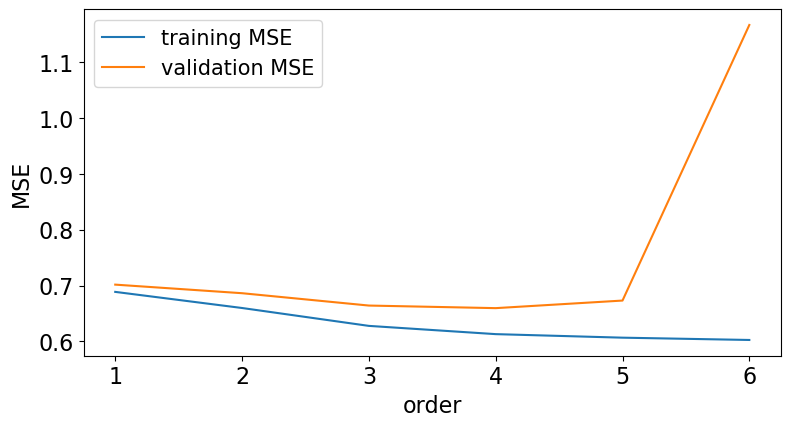

In [32]:
print('Training MSE: ', str(mse_train_list))
print('Validation MSE: ', str(mse_val_list))

# Plot MSE
plt.figure(1, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.linspace(1,max_order,max_order), mse_train_list, label='training MSE')
plt.plot(np.linspace(1,max_order,max_order), mse_val_list, label='validation MSE')
plt.xlabel('order') 
plt.ylabel('MSE')
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [33]:
# Best polynomial order should be selected according to validation set.
print("MSE for test set is : " + str(mse_test_list[3]))

MSE for test set is : 4.461844207567717


### (iv) ###

In [34]:
# Regularization
mse_train_list_reg = []
mse_val_list_reg = []
mse_test_list_reg = []
max_order = 6
lamda = 1

for order in range(1,max_order + 1):

    # Create polynomial features X to P
    Poly = PolynomialFeatures(order)
    X_train_poly = Poly.fit_transform(df_train)
    X_val_poly = Poly.transform(df_val)
    X_test_poly = Poly.transform(df_test)

    # learning (work out w)
    reg_L = lamda*np.identity(X_train_poly.shape[1])
    w_reg = inv(X_train_poly.T @ X_train_poly + reg_L) @ X_train_poly.T @ y_train
    print(f"Model coefficients for order {order}: {w_reg}")

    # Predict on the training, validation, and test sets
    y_train_pred = X_train_poly @ w_reg
    y_val_pred = X_val_poly @ w_reg
    y_test_pred = X_test_poly @ w_reg

    # Calculate and print the mean squared error for training, validation and test sets.
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"Order {order} - Training MSE: {mse_train}, Validation MSE: {mse_val}, Test MSE: {mse_test} \n")
    mse_train_list_reg.append(mse_train)
    mse_val_list_reg.append(mse_val)
    mse_test_list_reg.append(mse_test)



Model coefficients for order 1: [ 0.58163311  0.43479657 -0.03707177]
Order 1 - Training MSE: 0.6887546728139874, Validation MSE: 0.7017435778383698, Test MSE: 0.6981327546130593 

Model coefficients for order 2: [ 0.85198486  0.5393278  -0.18056847 -0.01679081  0.01629106  0.00138568]
Order 2 - Training MSE: 0.6599182129041286, Validation MSE: 0.6863711240559942, Test MSE: 0.7097982661865452 

Model coefficients for order 3: [ 1.78682487e+00  2.17488854e-01 -3.10822709e-01  5.63289068e-02
  7.08084971e-03  8.71195736e-03 -4.13167545e-03  1.28413244e-03
 -4.07153978e-04 -4.06972423e-05]
Order 3 - Training MSE: 0.6279272882875789, Validation MSE: 0.6644708134320308, Test MSE: 0.6600920487897872 

Model coefficients for order 4: [ 1.84004851e+00  5.54609952e-01 -3.82001824e-01  4.63144013e-02
 -1.19295355e-01  3.09159997e-02 -1.36929082e-02  2.67086506e-02
 -3.20595835e-04 -5.53798039e-04  5.18389151e-04 -8.36288832e-04
 -3.84898598e-04  4.08393748e-05  2.11088976e-06]
Order 4 - Training

====== With Regularization =======
Training MSE:  [0.6887546728139874, 0.6599182129041286, 0.6279272882875789, 0.6131715536256139, 0.6068817577770943, 0.6029996558109235]
Validation MSE:  [0.7017435778383698, 0.6863711240559942, 0.6644708134320308, 0.662020787107397, 0.662098847458955, 0.9755283939472557]


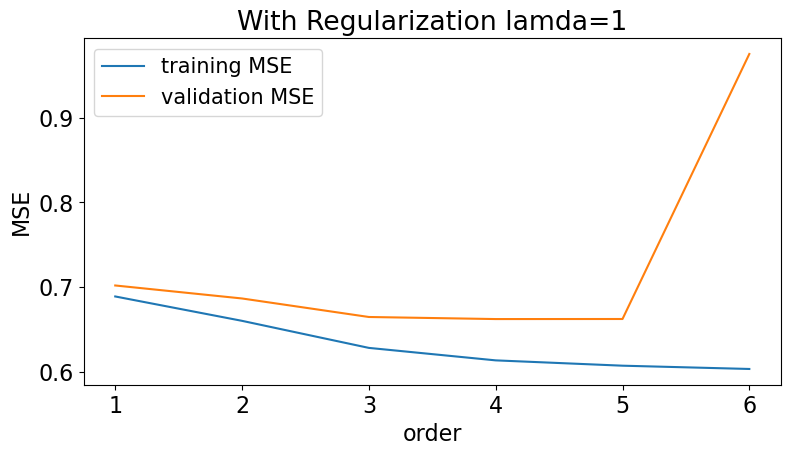

In [35]:
print('====== With Regularization =======')
print('Training MSE: ', str(mse_train_list_reg))
print('Validation MSE: ', str(mse_val_list_reg))

# Plot MSE
plt.figure(1, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.linspace(1,max_order,max_order), mse_train_list_reg, label='training MSE')
plt.plot(np.linspace(1,max_order,max_order), mse_val_list_reg, label='validation MSE')
plt.xlabel('order') 
plt.ylabel('MSE')
plt.title('With Regularization lamda=' + str(lamda))
plt.legend(loc='upper left', fontsize=15)
plt.show()

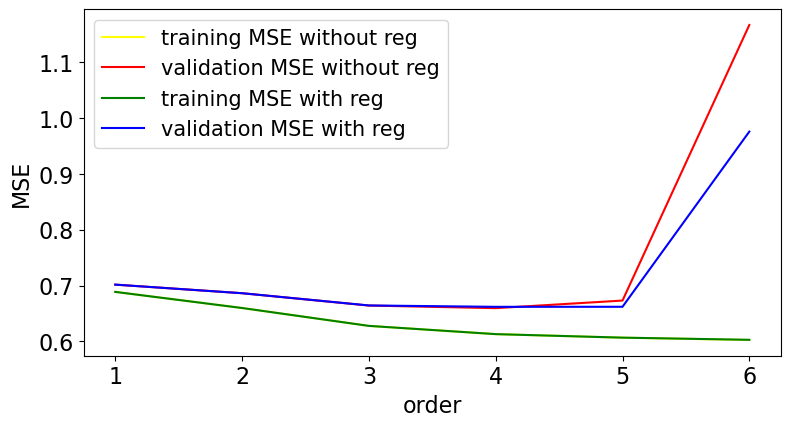

In [36]:
# Plot MSE together
plt.figure(4, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.linspace(1,max_order,max_order), mse_train_list, color = "yellow", label='training MSE without reg')
plt.plot(np.linspace(1,max_order,max_order), mse_val_list, color = "red", label='validation MSE without reg')
plt.plot(np.linspace(1,max_order,max_order), mse_train_list_reg, color = "green", label='training MSE with reg')
plt.plot(np.linspace(1,max_order,max_order), mse_val_list_reg, color = "blue", label='validation MSE with reg')
plt.xlabel('order') 
plt.ylabel('MSE')

plt.legend(loc='upper left', fontsize=15)
plt.show()

In [37]:
print("MSE for test set is : " + str(mse_test_list[3]))

MSE for test set is : 4.461844207567717
